In [45]:
import math
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

**Задание 2.**

Параметры модели

In [46]:
D = 1
alpha = 1
N = [10, 25, 50, 75, 100, 150, 200, 250, 300, 350]
H = [2, 5, 7]

Заданная ковариационная функция R(t).

In [47]:
def R(t):
    return D * math.exp(- alpha * abs(t))
def Cum(t):
    return (R(0)-R(t))

Моделирование десяти наборов наблюдений.

In [48]:
def gen_x(n):
    np.random.seed(2023)
    
    x = np.random.normal(0, 1, n)
    a0 = math.sqrt(D * (1 - math.exp(- 2 * alpha)))
    b1 = math.exp(- alpha)

    res = [0.] * n
    res[0] = a0 * x[0]
    for j in range(1, n):
        res[j] = a0 * x[j] + b1 * res[j - 1]
    

    return res

def gen_X(N):
    count = len(N)
    X = [0.]*count
    for i in range(count):
        X[i] = [.0]*N[i]

    for i in range(count):
        X[i] = gen_x(N[i])
    return X

X = gen_X(N)



def gen_D_class(X, H):
    D_class = [.0]*len(H)
    for i in range(len(H)):
        D_class[i] = [.0]*len(X)
    for i in range(len(H)):
        h = H[i]
        for j in range(len(X)):
            D_class[i][j] = 0
            for s in range(1, len(X[j])-h+1):
                for t in range(1, len(X[j])-h+1):
                    D_class[i][j]+=math.pow(Cum(s-t+h)+Cum(s-t-h)+2*Cum(s-t),2)
            D_class[i][j] /= 2*math.pow(len(X[j])-h, 2)
    return D_class




Графики зависимости дисперсии от количества наблюдений для классической оценки

5.117234954036824 6.834832221927911 7.420048773476576 7.614178739495742 7.710966746299006 7.807544598649741 7.855749136470689 7.8846436232371735 7.903894573002953 7.917639268053276 
5.352634654560446 6.7084814633258825 7.36817550544291 7.583207797842734 7.689183492558326 7.794016962765809 7.84598375447638 7.877015541620649 7.897640718272116 7.912342021671868 
4.568849097012521 6.685598829824481 7.355212976768727 7.576436730966493 7.684946016178829 7.791794581339831 7.844551979750246 7.875984792183102 7.89684603540535 7.91170043598674 


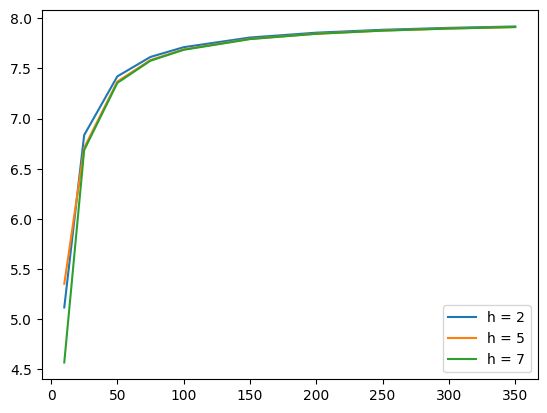

In [49]:
D_class = gen_D_class(X,H)
for i in range(len(H)):
    for j in range(len(X)):
        print(D_class[i][j], end = " ")
    print("")
h = [.0]*len(X)
for i in range(len(X)):
    h[i] = len(X[i])
for i in range(len(H)):
    plt.plot(h, D_class[i], label = 'h = '+str(H[i]))
    plt.legend()
plt.show()